![convert notebook to web app](https://user-images.githubusercontent.com/48794028/148332938-4e66d4ca-2d16-474f-8482-340aef6a48d0.png)


### Author: Mitra Zamani

## Overview:

Evaluating & Forecasting Property Prices Through Modelling.

## Business Problem:

I am tasked to help a Real Estate Buyer's Agency in seeking to identify key property features, such as square footage and number of rooms, to identify undervalued properties that can be presented as investment opportunities for clients.

## Data:

The data utilized in this project was sourced from the kc_house_data CSV file. The data set is comprised of 21,597 rows and 21 columns, providing an ample amount of information for modeling purposes. This comprehensive data set is well-suited to support the modeling process and can be expected to yield reliable results.

In [1]:
# Load necessary libraries and import the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import scipy as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from scipy import stats

In [2]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('/Users/mitraz/Desktop/Realstate_project/dsc-phase-2-project/data/kc_house_data.csv')

In [4]:
# Check the columns and first few rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.shape

(21597, 21)

## Inspect data:

Upon conducting an initial review of the data, it was observed that there were a limited number of missing values present. Additionally, there were several instances where the data types differed, requiring appropriate addressing to ensure a cohesive and accurate analysis. These findings emphasize the importance of thorough data inspection and proper data preparation, which are critical steps in the modeling process.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


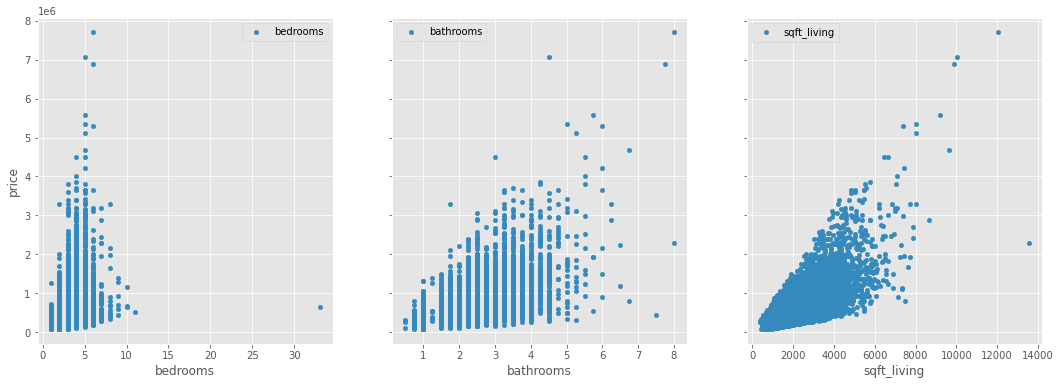

In [8]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, features in enumerate(['bedrooms', 'bathrooms', 'sqft_living']):
    data.plot(kind='scatter', x=features, y='price', ax=axs[idx], label=features)
plt.legend()
plt.show()

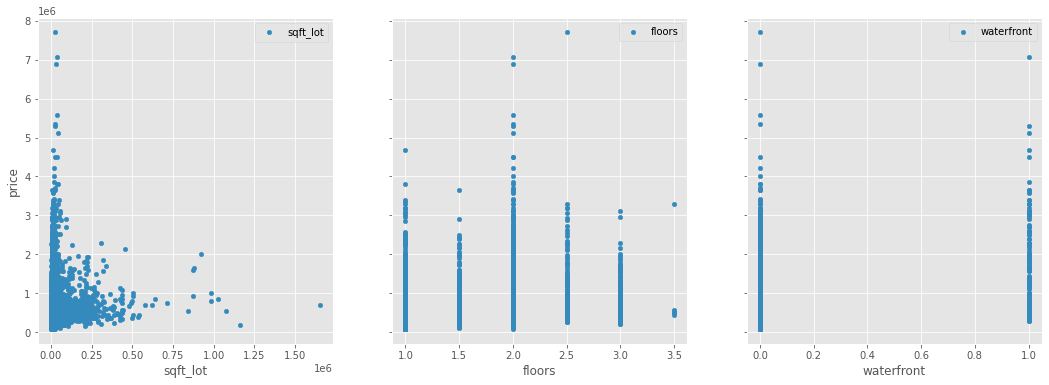

In [9]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, features in enumerate(['sqft_lot', 'floors', 'waterfront']):
    data.plot(kind='scatter', x=features, y='price', ax=axs[idx], label=features)
plt.legend()
plt.show()

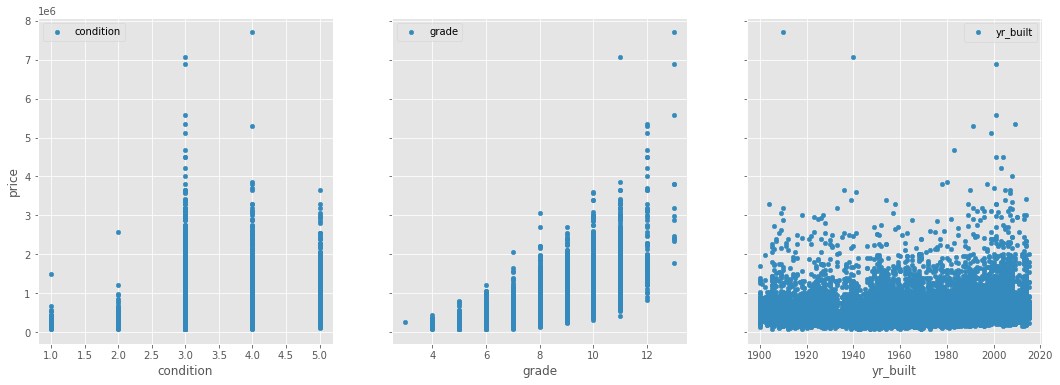

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, features in enumerate(['condition', 'grade', 'yr_built']):
    data.plot(kind='scatter', x=features, y='price', ax=axs[idx], label=features)
plt.legend()
plt.show()

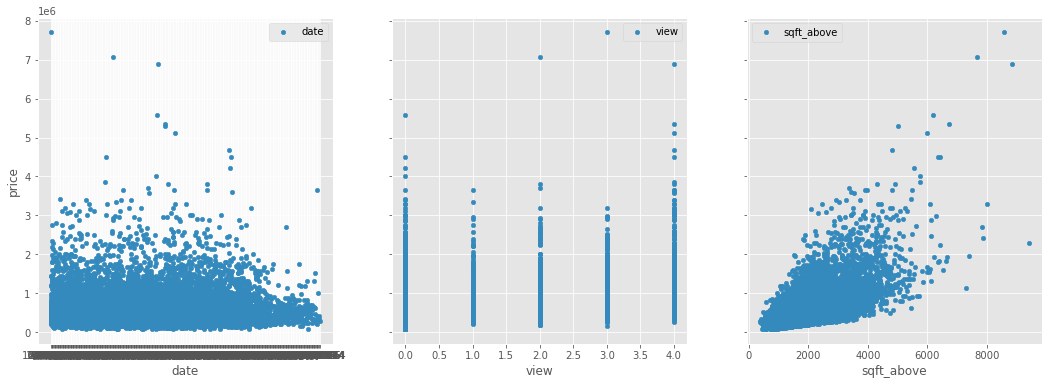

In [11]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, features in enumerate(['date', 'view', 'sqft_above']):
    data.plot(kind='scatter', x=features, y='price', ax=axs[idx], label=features)
plt.legend()
plt.show()

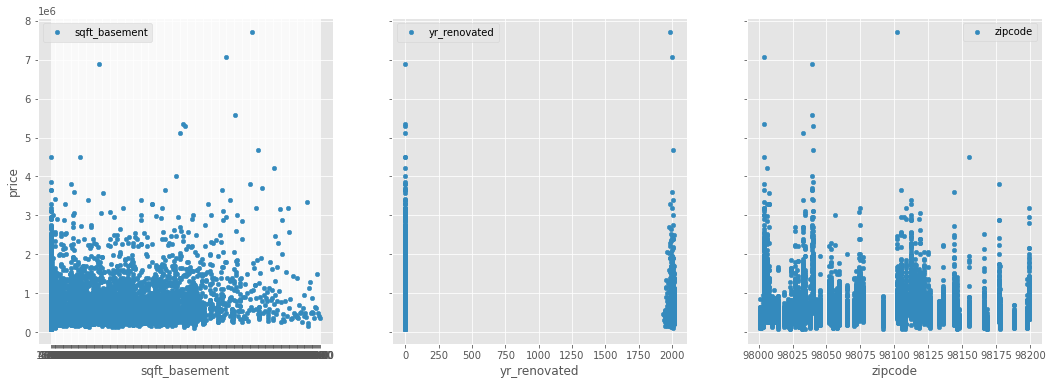

In [12]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, features in enumerate(['sqft_basement', 'yr_renovated', 'zipcode']):
    data.plot(kind='scatter', x=features, y='price', ax=axs[idx], label=features)
plt.legend()
plt.show()

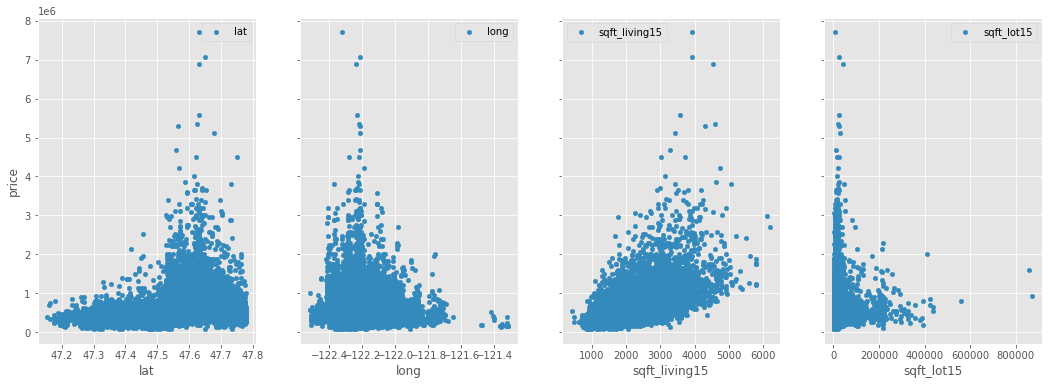

In [13]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
for idx, features in enumerate(['lat', 'long', 'sqft_living15', 'sqft_lot15']):
    data.plot(kind='scatter', x=features, y='price', ax=axs[idx], label=features)
plt.legend()
plt.show()

In [14]:
#finding missing values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data cleaning

waterfront - House which has a view to a waterfront.
0 represents False and 1 represents True.

In [15]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

View - represents how many times a house has been viewed.

In [16]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

For both of these columns, zero has the highest count.So filling the null values with 0 should not have a significant effect on result. Also I drop yr_renovated column because it has many null values.

In [17]:
#Apply the changes
data = data.drop('yr_renovated', axis = True)
data = data.fillna(0)
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Remove some columns that they have many outliers, they are not really important for predicting price and they don't have a strong relationship with the price.

In [18]:
data.drop(['date', 'zipcode', 'sqft_basement', 'lat', 'long', 'sqft_lot15', 'id'], axis = 1, inplace = True)

In [19]:
#Change data to int
data['floors'] = data['floors'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['waterfront'] = data['waterfront'].astype(int)
data['view'] = data['view'].astype(int)

## Remove outliers

removing bedrooms outliers.

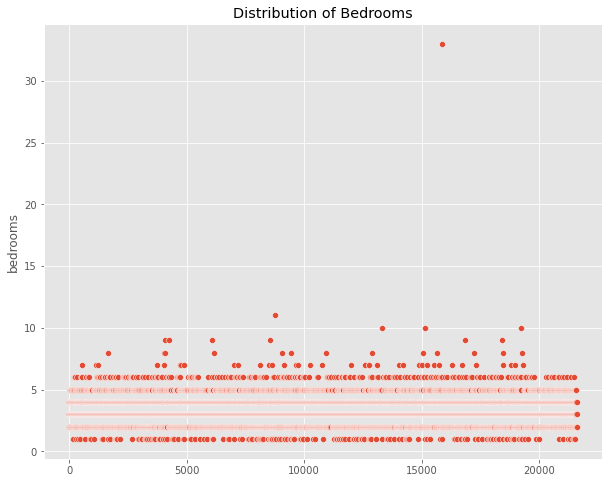

In [20]:
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.scatterplot(data = data['bedrooms'])
ax.set_title('Distribution of Bedrooms')
plt.show();

This graph shows there is on outlier in bedrooms column. Which is mor than 30.

In [21]:
#house with more than 30 bedrooms
data[data.bedrooms > 30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15
15856,640000.0,33,1,1620,6000,1,0,0,5,7,1040,1947,1330


In [22]:
#Delete Bedroom outlier
data = data.drop([15856])

## Dealing with Categorical values

I divided the 'bedrooms', 'bathrooms' and 'grade' variables into smaller groups to reduce the risk of a "dummy variable trap," which can occur when there are too many categorical predictors. Also, I omitted the first category to eliminate any potential issues with multicollinearity.

In [23]:
#Change Bedroom into 3 sections. 
data['1-3_bedrooms'] = data['bedrooms'].apply(lambda x: True if x <= 3 else False)
data['1-3_bedrooms'] = data['1-3_bedrooms'].astype(int)

data['4-7_bedrooms'] = data['bedrooms'].apply(lambda x: True if x <= 6 and x > 3 else False)
data['4-7_bedrooms'] = data['4-7_bedrooms'].astype(int)

data['7+_bedrooms'] = data['bedrooms'].apply(lambda x: True if x >= 7 else False)
data['7+_bedrooms'] = data['7+_bedrooms'].astype(int)

#drop first one to reduce multicollinarity
data.drop('1-3_bedrooms', inplace=True, axis=1)
data.drop('bedrooms', inplace=True, axis=1)

In [24]:
#Change bathrooms into 2 sections. 
data['1-3_bathrooms'] = data['bathrooms'].apply(lambda x: True if x <= 3 else False)
data['1-3_bathrooms'] = data['1-3_bathrooms'].astype(int)

data['4+_bathrooms'] = data['bathrooms'].apply(lambda x: True if x >= 4 else False)
data['4+_bathrooms'] = data['4+_bathrooms'].astype(int)

#drop first one to reduce multicollinarity
data.drop('1-3_bathrooms', inplace=True, axis=1)
data.drop('bathrooms', inplace=True, axis=1)

In [25]:
#Change grade into 3 sections. 
data['3-6_grade'] = data['grade'].apply(lambda x: True if x <= 6 else False)
data['3-6_grade'] = data['3-6_grade'].astype(int)

data['7-10_grade'] = data['grade'].apply(lambda x: True if x <= 9 and x > 6 else False)
data['7-10_grade'] = data['7-10_grade'].astype(int)

data['10+_grade'] = data['grade'].apply(lambda x: True if x >= 10 else False)
data['10+_grade'] = data['10+_grade'].astype(int)

#drop first one to reduce multicollinarity
data.drop('3-6_grade', inplace=True, axis=1)
data.drop('grade', inplace=True, axis=1)

In [26]:
data.head()

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,sqft_living15,4-7_bedrooms,7+_bedrooms,4+_bathrooms,7-10_grade,10+_grade
0,221900.0,1180,5650,1,0,0,3,1180,1955,1340,0,0,0,1,0
1,538000.0,2570,7242,2,0,0,3,2170,1951,1690,0,0,0,1,0
2,180000.0,770,10000,1,0,0,3,770,1933,2720,0,0,0,0,0
3,604000.0,1960,5000,1,0,0,5,1050,1965,1360,1,0,0,1,0
4,510000.0,1680,8080,1,0,0,3,1680,1987,1800,0,0,0,1,0


### Remove some columns.
I drop view and condition columns because view is not really important for my prediction.

In [27]:
data.drop(['view', 'condition'], axis = 1, inplace = True)

## One Hot Encode (OHE)

I used OHE to create dummy variables from the remaining categorical predictors.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

categoricals = ['floors', 'waterfront'] 
continuous = ['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot', 'yr_built', '4-7_bedrooms', '7+_bedrooms', '4+_bathrooms',  '7-10_grade',
 '10+_grade']

ohe = pd.get_dummies(data[categoricals], columns=['floors', 'waterfront'], drop_first=True)
ohe


,floors_2,floors_3,waterfront_1
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
21592,0,1,0
21593,1,0,0
21594,1,0,0
21595,1,0,0


### Join dummies and continuous data

In [29]:
continuous = data[continuous]
preprocessed = pd.concat([continuous, ohe], axis=1)

#reduce the number of dummies a bit further
preprocessed.drop('floors_3', inplace=True, axis=1)

preprocessed.head()

,price,sqft_living,sqft_above,sqft_living15,sqft_lot,yr_built,4-7_bedrooms,7+_bedrooms,4+_bathrooms,7-10_grade,10+_grade,floors_2,waterfront_1
0,221900.0,1180,1180,1340,5650,1955,0,0,0,1,0,0,0
1,538000.0,2570,2170,1690,7242,1951,0,0,0,1,0,1,0
2,180000.0,770,770,2720,10000,1933,0,0,0,0,0,0,0
3,604000.0,1960,1050,1360,5000,1965,1,0,0,1,0,0,0
4,510000.0,1680,1680,1800,8080,1987,0,0,0,1,0,0,0


<AxesSubplot:>

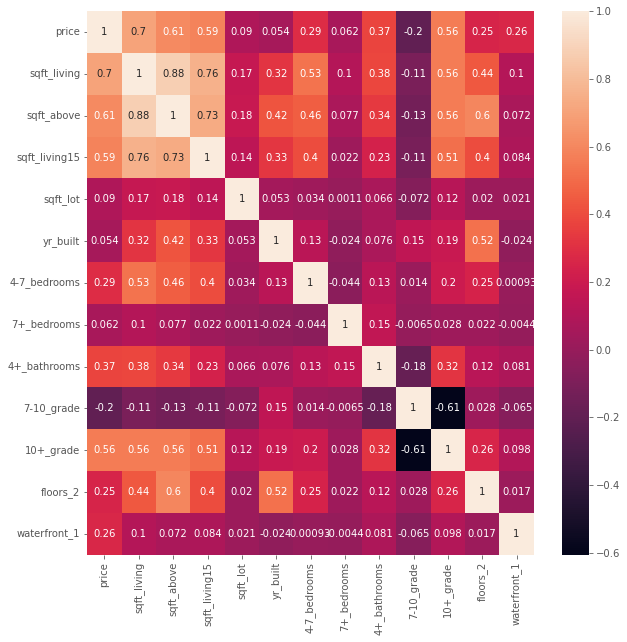

In [30]:
#heatmap for all the required features for correlation
df1= preprocessed[['price', '4-7_bedrooms', '7+_bedrooms', '4+_bathrooms',
    'sqft_lot', 'floors_2', 'waterfront_1', 'yr_built', 'sqft_living', '7-10_grade',
 '10+_grade', 'sqft_above', 'sqft_living15']]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(preprocessed.corr(),annot=True,ax=ax)

## Baseline Model

In [31]:
df = pd.DataFrame(preprocessed)

x = df[['4-7_bedrooms', '7+_bedrooms', '4+_bathrooms',
    'sqft_lot', 'floors_2', 'waterfront_1', 'yr_built', 'sqft_living', '7-10_grade',
 '10+_grade', 'sqft_above', 'sqft_living15']]
y = df['price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model_1 = sm.OLS(y, x).fit()
predictions = model_1.predict(x) 
 
model_summary = model_1.summary()
model_summary


Intercept: 
 5327694.244866377
Coefficients: 
 [-6.30772665e+04 -1.82147359e+05  2.43180638e+05 -3.52963340e-01
  2.13032571e+04  7.42231346e+05 -2.76185006e+03  2.16236363e+02
  8.51229135e+04  3.71573682e+05 -6.80462583e+00  6.76555497e+01]


/Users/mitraz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2917.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:34:56   Log-Likelihood:            -2.9697e+05
No. Observations:               21596   AIC:                         5.940e+05
Df Residuals:                   21583   BIC:                         5.941e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.328e+06   1.26e+05     42.428      0.000    5.08e+06    5.57e+06
4-7_bedrooms  -6.308e+04   3795.391    -16.619      0.000   -7.05e+04   -5.56e+04
7+_bedrooms   -1.821e+05   2.99e+04     -6.100      0.000   -2.41e+05   -1.24e+05
4+_bathrooms   2.432e+05   1.28e+04     19.069      0.000    2.18e+05    2.68e+05
sqft_lot         -0.3530      0.038     -9.211      0.000      -0.428      -0.278
floors_2        2.13e+04   4360.768      4.885      0.000    1.28e+04    2.99e+04
waterfront_1   7.422e+05   1.91e+04     38.908      0.000    7.05e+05     7.8e+05
yr_built      -2761.8501     64.871    -42.574      0.000   -2889.002   -2634.698
sqft_living     216.2364      4.204     51.440      0.000     207.997     224.476
7-10_grade     8.512e+04   5611.576     15.169      0.000    7.41e+04    9.61e+04
10+_grade      3.716e+05   9793.798     37.940      0.000    3.52e+05    3.91e+05
sqft_above       -6.8046      4.658     -1.461      0.144     -15.934       2.324
sqft_living15    67.6555      3.612     18.730      0.000      60.575      74.736
==============================================================================
Omnibus:                    13611.402   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           610845.584
Skew:                           2.414   Prob(JB):                         0.00
Kurtosis:                      28.603   Cond. No.                     3.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the OLS Regression Results

R – squared value: 

R2 is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 61.9 % variation in Y can be explained by X. The maximum possible value of R2  can be 1, means the larger the R2  value better the regression.

Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is  zero. This implies that overall the regressions is meaningful.

We have t-values and we have a given p-value associated with that t-test. Higher the t-value, the greater chances that we reject the null hypothesis and accept the alternate hypothesis. Lower the value of p that simply signifies that we again reject the null hypothesis. So essentially all the independent variables have a p value less than 0.05 except of sqft_above because we are testing the test at 95 percent confidence interval, so we reject the null hypothesis and accept the alternate hypothesis. If we look closely at sqft_above the t-value is very small on top of the p-values is very high. so because the p-value is greater than 0.05 we fail to reject the null hypothesis which is the coefficient of sqft_above is having a negative value so essentially sqft_above is irrelevant in case of our linear regression model. We can also drop it and not use it later on to make a prediction. 



In [32]:
data.drop(['sqft_above'], axis = 1, inplace = True)

## Verifying the Assumptions of Linear Regression 

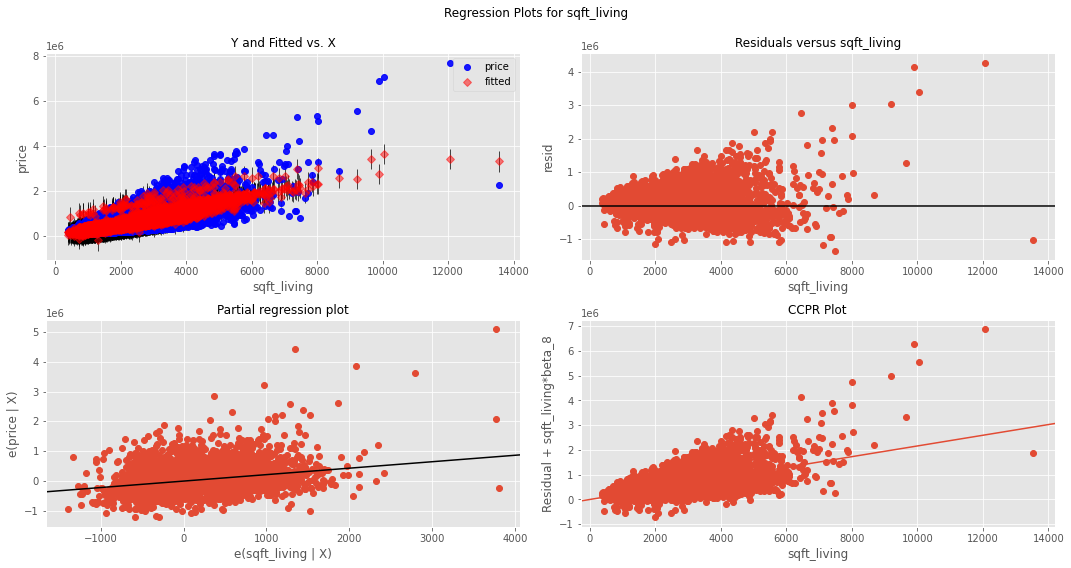

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, 'sqft_living', fig=fig)
plt.show()

## Record Your observations on heteroscedasticity

From the first and second plot in the first row, we see a cone-shape which is a sign of heteroscedasticity.  i.e. the residuals are heteroscedastic. This violates an assumption.

## Q-Q Plots


/Users/mitraz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


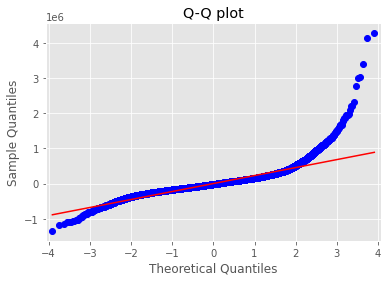

In [34]:
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    
normality_of_residuals_test(model_1)

Notice the points fall along a line in the middle of the graph, but curve off in the extremities. Normal QQ plots that exhibit this behavior usually mean your data have more extreme values than would be expected if they truly came from a normal distribution.

# Iteration 2

## Identify multicollinearity 

### Scatter matrix

In [35]:
columns = ['price', 'sqft_living', 'sqft_lot', 'yr_built', '4-7_bedrooms',
       '7+_bedrooms', '4+_bathrooms', '7-10_grade', '10+_grade', 'floors_2',
       'waterfront_1','sqft_living15']

In [36]:
data_pred = preprocessed.loc[:, columns]
data_pred.head()

,price,sqft_living,sqft_lot,yr_built,4-7_bedrooms,7+_bedrooms,4+_bathrooms,7-10_grade,10+_grade,floors_2,waterfront_1,sqft_living15
0,221900.0,1180,5650,1955,0,0,0,1,0,0,0,1340
1,538000.0,2570,7242,1951,0,0,0,1,0,1,0,1690
2,180000.0,770,10000,1933,0,0,0,0,0,0,0,2720
3,604000.0,1960,5000,1965,1,0,0,1,0,0,0,1360
4,510000.0,1680,8080,1987,0,0,0,1,0,0,0,1800


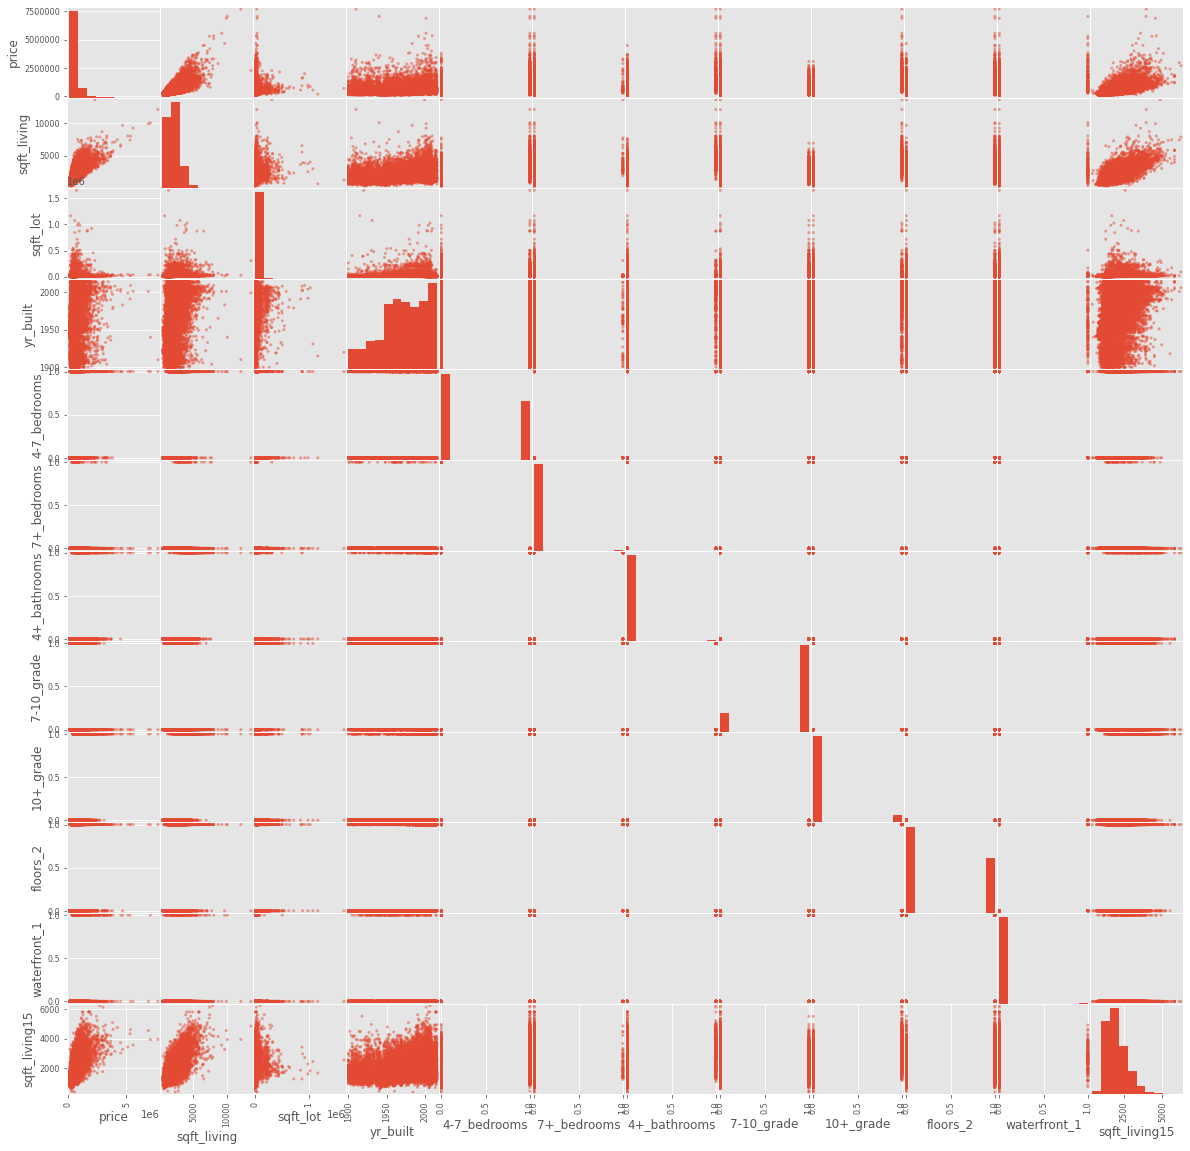

In [37]:
pd.plotting.scatter_matrix(data_pred, figsize=[20, 20]);

## Correlation matrix

In [38]:
data_pred.corr()

,price,sqft_living,sqft_lot,yr_built,4-7_bedrooms,7+_bedrooms,4+_bathrooms,7-10_grade,10+_grade,floors_2,waterfront_1,sqft_living15
price,1.000000,0.701929,0.089879,0.053965,0.289618,0.061529,0.372953,-0.198695,0.559655,0.253547,0.264308,0.585267
sqft_living,0.701929,1.000000,0.173449,0.318140,0.528030,0.104810,0.384009,-0.106165,0.558511,0.436143,0.104635,0.756400
sqft_lot,0.089879,0.173449,1.000000,0.052939,0.033652,0.001093,0.066118,-0.072382,0.117662,0.020439,0.021458,0.144756
yr_built,0.053965,0.318140,0.052939,1.000000,0.133119,-0.024476,0.076132,0.147968,0.187541,0.520035,-0.024491,0.326353
4-7_bedrooms,0.289618,0.528030,0.033652,0.133119,1.000000,-0.043946,0.133997,0.013547,0.203283,0.245184,0.000934,0.399896
7+_bedrooms,0.061529,0.104810,0.001093,-0.024476,-0.043946,1.000000,0.154053,-0.006465,0.027645,0.021988,-0.004391,0.022350
4+_bathrooms,0.372953,0.384009,0.066118,0.076132,0.133997,0.154053,1.000000,-0.181444,0.320622,0.122085,0.080616,0.234870
7-10_grade,-0.198695,-0.106165,-0.072382,0.147968,0.013547,-0.006465,-0.181444,1.000000,-0.605569,0.027771,-0.064862,-0.110342
10+_grade,0.559655,0.558511,0.117662,0.187541,0.203283,0.027645,0.320622,-0.605569,1.000000,0.257592,0.098149,0.513251
floors_2,0.253547,0.436143,0.020439,0.520035,0.245184,0.021988,0.122085,0.027771,0.257592,1.000000,0.016506,0.400594


Return True for positive or negative correlations that are bigger than 0.75 in the correlation matrix:

In [39]:
abs(data_pred.corr()) > 0.75

,price,sqft_living,sqft_lot,yr_built,4-7_bedrooms,7+_bedrooms,4+_bathrooms,7-10_grade,10+_grade,floors_2,waterfront_1,sqft_living15
price,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,False,False,False,False,False,True
sqft_lot,False,False,True,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,True,False,False,False,False,False,False,False,False
4-7_bedrooms,False,False,False,False,True,False,False,False,False,False,False,False
7+_bedrooms,False,False,False,False,False,True,False,False,False,False,False,False
4+_bathrooms,False,False,False,False,False,False,True,False,False,False,False,False
7-10_grade,False,False,False,False,False,False,False,True,False,False,False,False
10+_grade,False,False,False,False,False,False,False,False,True,False,False,False
floors_2,False,False,False,False,False,False,False,False,False,True,False,False


Now, include stack and zip to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [40]:
df = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_living15, sqft_living)",0.7564


There is one set of variales that are highly correlated.

## Check the VIF

In [41]:
# VIF

def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Value']  = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return(vif)

In [42]:
features = data_pred.iloc[:,1:13]
print(features.head())
calculate_vif(features)

   sqft_living  sqft_lot  yr_built  4-7_bedrooms  7+_bedrooms  4+_bathrooms  \
0         1180      5650      1955             0            0             0   
1         2570      7242      1951             0            0             0   
2          770     10000      1933             0            0             0   
3         1960      5000      1965             1            0             0   
4         1680      8080      1987             0            0             0   

   7-10_grade  10+_grade  floors_2  waterfront_1  sqft_living15  
0           1          0         0             0           1340  
1           1          0         1             0           1690  
2           0          0         0             0           2720  
3           1          0         0             0           1360  
4           1          0         0             0           1800  


,features,VIF_Value
0,sqft_living,22.725926
1,sqft_lot,1.182731
2,yr_built,17.004833
3,4-7_bedrooms,2.440309
4,7+_bedrooms,1.053329
5,4+_bathrooms,1.267834
6,7-10_grade,10.278493
7,10+_grade,2.971356
8,floors_2,2.076085
9,waterfront_1,1.027484


The VIF value of sqft_living and sqft_living15 are higher then the others variables. So we are camparing their correlation.

In [43]:
data_pred.corr()

,price,sqft_living,sqft_lot,yr_built,4-7_bedrooms,7+_bedrooms,4+_bathrooms,7-10_grade,10+_grade,floors_2,waterfront_1,sqft_living15
price,1.000000,0.701929,0.089879,0.053965,0.289618,0.061529,0.372953,-0.198695,0.559655,0.253547,0.264308,0.585267
sqft_living,0.701929,1.000000,0.173449,0.318140,0.528030,0.104810,0.384009,-0.106165,0.558511,0.436143,0.104635,0.756400
sqft_lot,0.089879,0.173449,1.000000,0.052939,0.033652,0.001093,0.066118,-0.072382,0.117662,0.020439,0.021458,0.144756
yr_built,0.053965,0.318140,0.052939,1.000000,0.133119,-0.024476,0.076132,0.147968,0.187541,0.520035,-0.024491,0.326353
4-7_bedrooms,0.289618,0.528030,0.033652,0.133119,1.000000,-0.043946,0.133997,0.013547,0.203283,0.245184,0.000934,0.399896
7+_bedrooms,0.061529,0.104810,0.001093,-0.024476,-0.043946,1.000000,0.154053,-0.006465,0.027645,0.021988,-0.004391,0.022350
4+_bathrooms,0.372953,0.384009,0.066118,0.076132,0.133997,0.154053,1.000000,-0.181444,0.320622,0.122085,0.080616,0.234870
7-10_grade,-0.198695,-0.106165,-0.072382,0.147968,0.013547,-0.006465,-0.181444,1.000000,-0.605569,0.027771,-0.064862,-0.110342
10+_grade,0.559655,0.558511,0.117662,0.187541,0.203283,0.027645,0.320622,-0.605569,1.000000,0.257592,0.098149,0.513251
floors_2,0.253547,0.436143,0.020439,0.520035,0.245184,0.021988,0.122085,0.027771,0.257592,1.000000,0.016506,0.400594


The correlation of sqft_living15 is lower than the correlation of sqft_living. So we are dropping the sqft_living15.

In [44]:
data_pred = data_pred.drop(['sqft_living15'], axis = 1)

We are dropping some columns that are not important for our prediction. also their correlation is low.

In [45]:
data_pred = data_pred.drop(['waterfront_1'], axis = 1)
data_pred = data_pred.drop(['4-7_bedrooms'], axis = 1)
data_pred = data_pred.drop(['7+_bedrooms'], axis = 1)
data_pred = data_pred.drop(['7-10_grade'], axis = 1)
data_pred = data_pred.drop(['floors_2'], axis = 1)

In [46]:
data_pred

,price,sqft_living,sqft_lot,yr_built,4+_bathrooms,10+_grade
0,221900.0,1180,5650,1955,0,0
1,538000.0,2570,7242,1951,0,0
2,180000.0,770,10000,1933,0,0
3,604000.0,1960,5000,1965,0,0
4,510000.0,1680,8080,1987,0,0
...,...,...,...,...,...,...
21592,360000.0,1530,1131,2009,0,0
21593,400000.0,2310,5813,2014,0,0
21594,402101.0,1020,1350,2009,0,0
21595,400000.0,1600,2388,2004,0,0


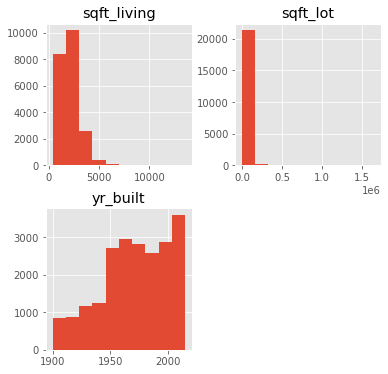

In [47]:
data_pred[['sqft_living', 'sqft_lot', 'yr_built']].hist(figsize  = [6, 6]); 

## Log Transformations

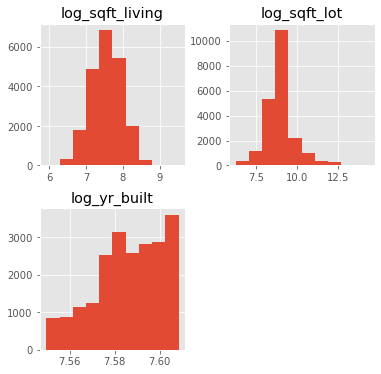

In [48]:
data_log = pd.DataFrame([])
data_log['log_sqft_living'] = np.log(data_pred['sqft_living'])
data_log['log_sqft_lot'] = np.log(data_pred['sqft_lot'])
data_log['log_yr_built'] = np.log(data_pred['yr_built'])
data_log.hist(figsize  = [6, 6]);

## Merging 
merging the new columns with our data frame and drop the previous columns.

In [49]:
data_log = data_log.merge(data_pred, left_index=True, right_index=True)
data_log

,log_sqft_living,log_sqft_lot,log_yr_built,price,sqft_living,sqft_lot,yr_built,4+_bathrooms,10+_grade
0,7.073270,8.639411,7.578145,221900.0,1180,5650,1955,0,0
1,7.851661,8.887653,7.576097,538000.0,2570,7242,1951,0,0
2,6.646391,9.210340,7.566828,180000.0,770,10000,1933,0,0
3,7.580700,8.517193,7.583248,604000.0,1960,5000,1965,0,0
4,7.426549,8.997147,7.594381,510000.0,1680,8080,1987,0,0
...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.030857,7.605392,360000.0,1530,1131,2009,0,0
21593,7.745003,8.667852,7.607878,400000.0,2310,5813,2014,0,0
21594,6.927558,7.207860,7.605392,402101.0,1020,1350,2009,0,0
21595,7.377759,7.778211,7.602900,400000.0,1600,2388,2004,0,0


In [50]:
data_log = data_log.drop(['sqft_living', 'sqft_lot', 'yr_built'], axis = 1)


## Baseline model

In [51]:
df1 = pd.DataFrame(data_log)

x = df1[['log_sqft_living', 'log_sqft_lot', 'log_yr_built', '4+_bathrooms', '10+_grade']]
y = df1['price']
 
# with sklearn
regr_2 = linear_model.LinearRegression()
regr_2.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model_2 = sm.OLS(y, x).fit()
predictions_2 = model_2.predict(x) 
 
model_2_summary = model_2.summary()
model_2_summary


Intercept: 
 5327694.244866377
Coefficients: 
 [-6.30772665e+04 -1.82147359e+05  2.43180638e+05 -3.52963340e-01
  2.13032571e+04  7.42231346e+05 -2.76185006e+03  2.16236363e+02
  8.51229135e+04  3.71573682e+05 -6.80462583e+00  6.76555497e+01]


/Users/mitraz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     4962.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:35:13   Log-Likelihood:            -2.9912e+05
No. Observations:               21596   AIC:                         5.982e+05
Df Residuals:                   21590   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.534e+07   9.23e+05     38.263      0.000    3.35e+07    3.71e+07
log_sqft_living   4.52e+05   5005.728     90.287      0.000    4.42e+05    4.62e+05
log_sqft_lot     -3.98e+04   2026.100    -19.644      0.000   -4.38e+04   -3.58e+04
log_yr_built    -4.995e+06   1.23e+05    -40.628      0.000   -5.24e+06   -4.75e+06
4+_bathrooms      4.02e+05   1.35e+04     29.812      0.000    3.76e+05    4.28e+05
10+_grade        4.634e+05   7476.616     61.984      0.000    4.49e+05    4.78e+05
==============================================================================
Omnibus:                    17811.217   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1589786.556
Skew:                           3.429   Prob(JB):                         0.00
Kurtosis:                      44.469   Cond. No.                     7.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the OLS Regression Results

R – squared value: 

R2 is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 53.5 % variation in Y can be explained by X. The maximum possible value of R2  can be 1, means the larger the R2  value better the regression.

Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is  zero. This implies that overall the regressions is meaningful.

We have t-values and we have a given p-value associated with that t-test. Higher the t-value, the greater chances that we reject the null hypothesis and accept the alternate hypothesis. Lower the value of p that simply signifies that we again reject the null hypothesis. So essentially all the independent variables have a p value less than 0.05 because we are testing the test at 95 percent confidence interval, so we reject the null hypothesis and accept the alternate hypothesis.


## Verifying the Assumptions of Linear Regression 

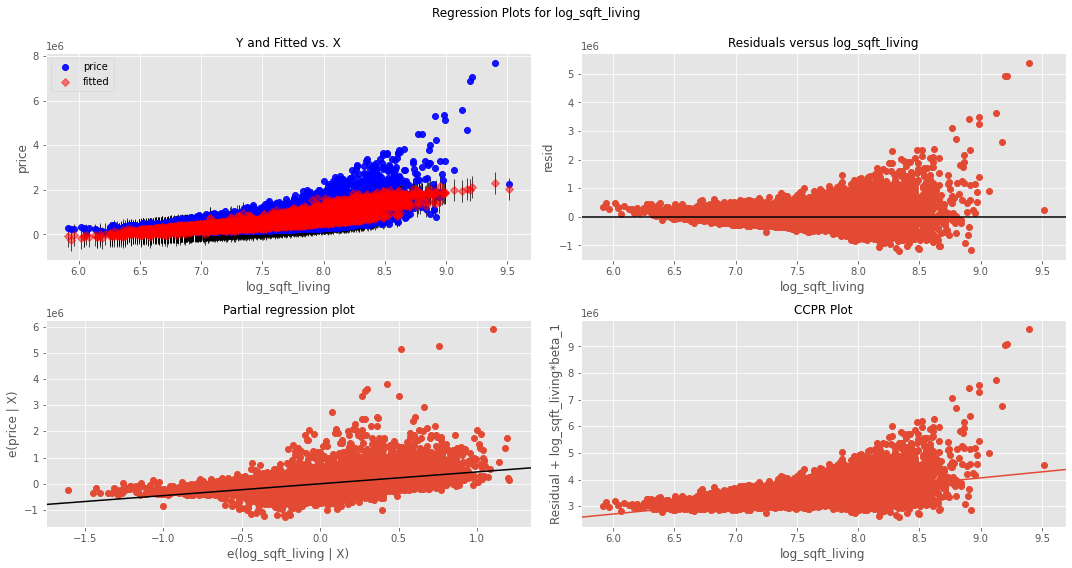

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_2, 'log_sqft_living', fig=fig)
plt.show()

## Record Your observations on heteroscedasticity

From the first and second plot in the first row, figures illustrate a heteroscedastic data set.  i.e. the residuals are heteroscedastic. This violates an assumption.

## Q-Q Plots

/Users/mitraz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


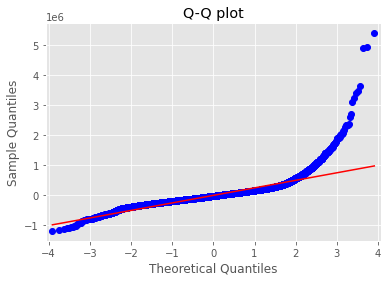

In [53]:
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

  
normality_of_residuals_test(model_2)

Notice the points fall along a line in the middle of the graph, but curve off in the extremities. Normal QQ plots that exhibit this behavior usually mean your data have more extreme values than would be expected if they truly came from a normal distribution. the residuals QQ plot looks off, so the normality assumption is not fulfilled.

# Itration 3

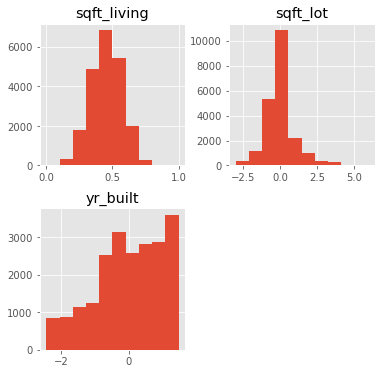

In [54]:

log_sqft_living = data_log['log_sqft_living']
log_sqft_lot = data_log['log_sqft_lot']
log_yr_built = data_log['log_yr_built']

scaled_sqft_living = (log_sqft_living - min(log_sqft_living)) / (max(log_sqft_living) - min(log_sqft_living))
scaled_sqft_lot = (log_sqft_lot - np.mean(log_sqft_lot)) / np.sqrt(np.var(log_sqft_lot))
scaled_yr_built = (log_yr_built - np.mean(log_yr_built)) / np.sqrt(np.var(log_yr_built))


data_cont_scaled = pd.DataFrame([])
data_cont_scaled['sqft_living'] = scaled_sqft_living
data_cont_scaled['sqft_lot'] = scaled_sqft_lot
data_cont_scaled['yr_built'] = scaled_yr_built


data_cont_scaled.hist(figsize = [6, 6]);

In [55]:
data_cont_scaled

,sqft_living,sqft_lot,yr_built
0,0.322166,-0.388446,-0.537454
1,0.538392,-0.113256,-0.674373
2,0.203585,0.244461,-1.294003
3,0.463123,-0.523930,-0.196379
4,0.420302,0.008125,0.547917
...,...,...,...
21592,0.394322,-2.171614,1.284018
21593,0.508764,-0.356917,1.450189
21594,0.281690,-1.975398,1.284018
21595,0.406749,-1.343132,1.117433


## Merging 
merging the new columns with our data frame and drop the previous columns.

In [56]:
data_cont_scaled = data_cont_scaled.merge(data_log, left_index=True, right_index=True)
data_cont_scaled

,sqft_living,sqft_lot,yr_built,log_sqft_living,log_sqft_lot,log_yr_built,price,4+_bathrooms,10+_grade
0,0.322166,-0.388446,-0.537454,7.073270,8.639411,7.578145,221900.0,0,0
1,0.538392,-0.113256,-0.674373,7.851661,8.887653,7.576097,538000.0,0,0
2,0.203585,0.244461,-1.294003,6.646391,9.210340,7.566828,180000.0,0,0
3,0.463123,-0.523930,-0.196379,7.580700,8.517193,7.583248,604000.0,0,0
4,0.420302,0.008125,0.547917,7.426549,8.997147,7.594381,510000.0,0,0
...,...,...,...,...,...,...,...,...,...
21592,0.394322,-2.171614,1.284018,7.333023,7.030857,7.605392,360000.0,0,0
21593,0.508764,-0.356917,1.450189,7.745003,8.667852,7.607878,400000.0,0,0
21594,0.281690,-1.975398,1.284018,6.927558,7.207860,7.605392,402101.0,0,0
21595,0.406749,-1.343132,1.117433,7.377759,7.778211,7.602900,400000.0,0,0


In [57]:
data_cont_scaled = data_cont_scaled.drop(['log_sqft_living', 'log_sqft_lot', 'log_yr_built'], axis = 1)
data_cont_scaled

,sqft_living,sqft_lot,yr_built,price,4+_bathrooms,10+_grade
0,0.322166,-0.388446,-0.537454,221900.0,0,0
1,0.538392,-0.113256,-0.674373,538000.0,0,0
2,0.203585,0.244461,-1.294003,180000.0,0,0
3,0.463123,-0.523930,-0.196379,604000.0,0,0
4,0.420302,0.008125,0.547917,510000.0,0,0
...,...,...,...,...,...,...
21592,0.394322,-2.171614,1.284018,360000.0,0,0
21593,0.508764,-0.356917,1.450189,400000.0,0,0
21594,0.281690,-1.975398,1.284018,402101.0,0,0
21595,0.406749,-1.343132,1.117433,400000.0,0,0


## Baseline model

In [58]:
df2 = pd.DataFrame(data_cont_scaled)

x = df2[['sqft_living', 'sqft_lot', 'yr_built', '4+_bathrooms', '10+_grade']]
y = df2['price']
 
# with sklearn
regr_3 = linear_model.LinearRegression()
regr_3.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model_3 = sm.OLS(y, x).fit()
predictions_2 = model_3.predict(x) 
 
model_3_summary = model_3.summary()
model_3_summary


Intercept: 
 5327694.244866377
Coefficients: 
 [-6.30772665e+04 -1.82147359e+05  2.43180638e+05 -3.52963340e-01
  2.13032571e+04  7.42231346e+05 -2.76185006e+03  2.16236363e+02
  8.51229135e+04  3.71573682e+05 -6.80462583e+00  6.76555497e+01]


/Users/mitraz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     4962.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:35:15   Log-Likelihood:            -2.9912e+05
No. Observations:               21596   AIC:                         5.982e+05
Df Residuals:                   21590   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.422e+05   8167.527    -29.657      0.000   -2.58e+05   -2.26e+05
sqft_living   1.627e+06    1.8e+04     90.287      0.000    1.59e+06    1.66e+06
sqft_lot      -3.59e+04   1827.696    -19.644      0.000   -3.95e+04   -3.23e+04
yr_built     -7.472e+04   1839.069    -40.628      0.000   -7.83e+04   -7.11e+04
4+_bathrooms   4.02e+05   1.35e+04     29.812      0.000    3.76e+05    4.28e+05
10+_grade     4.634e+05   7476.616     61.984      0.000    4.49e+05    4.78e+05
==============================================================================
Omnibus:                    17811.217   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1589786.556
Skew:                           3.429   Prob(JB):                         0.00
Kurtosis:                      44.469   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the OLS Regression Results

R – squared value: 

R2 is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 53.5 % variation in Y can be explained by X. The maximum possible value of R2  can be 1, means the larger the R2  value better the regression.

Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is  zero. This implies that overall the regressions is meaningful.

We have t-values and we have a given p-value associated with that t-test. Higher the t-value, the greater chances that we reject the null hypothesis and accept the alternate hypothesis. Lower the value of p that simply signifies that we again reject the null hypothesis. So essentially all the independent variables have a p value less than 0.05 because we are testing the test at 95 percent confidence interval, so we reject the null hypothesis and accept the alternate hypothesis.


## Verifying the Assumptions of Linear Regression 

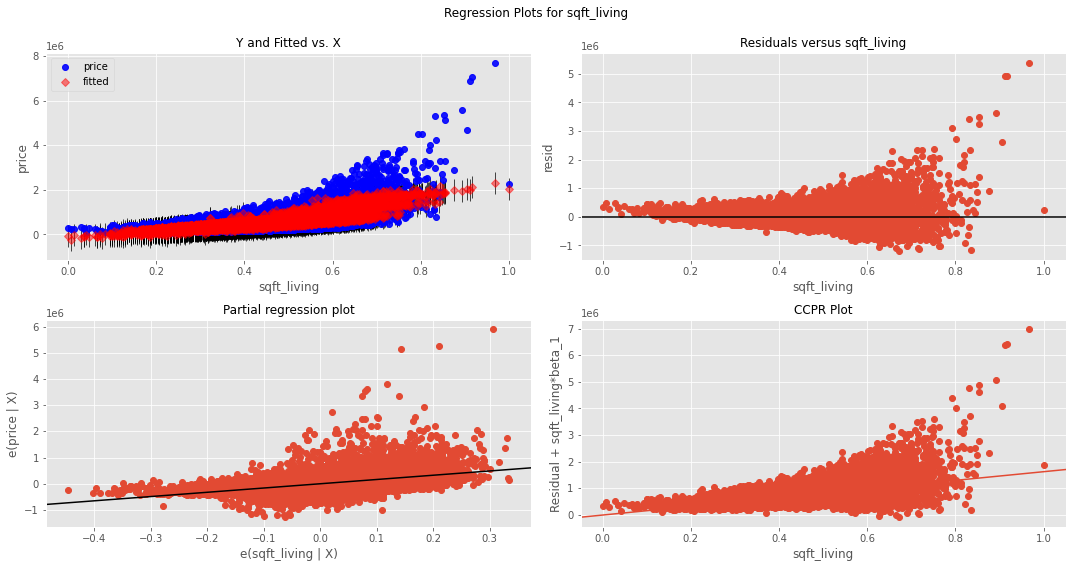

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_3, 'sqft_living', fig=fig)
plt.show()

## Record Your observations on heteroscedasticity

From the first and second plot in the first row, figures illustrate a heteroscedastic data set.  i.e. the residuals are heteroscedastic. This violates an assumption.

## Q-Q plots

/Users/mitraz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


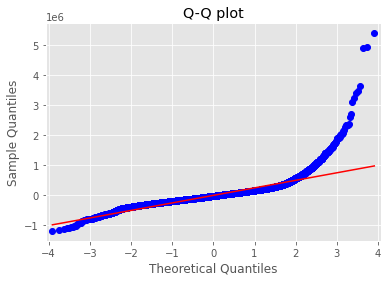

In [60]:
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    
normality_of_residuals_test(model_3)

the residuals QQ plot looks off, so the normality assumption is not fulfilled.

## Model validations (Train/Test Split)

In [61]:
X, y =  data_cont_scaled.loc[:, data_cont_scaled.columns != 'price'],  data_cont_scaled['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 42)

In [62]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [63]:
y_train

6243     332500.0
8986     390000.0
9419     800000.0
10155    462000.0
10436    695000.0
           ...   
11964    440000.0
21576    475000.0
5390     299800.0
860      245000.0
15795    545000.0
Name: price, Length: 17276, dtype: float64

### Generate Predictions on Training and Test Sets

In [64]:
y_hat_train = regr.predict(X_train)
y_hat_test = regr.predict(X_test)

### Calculate the Mean Squared Error (MSE)

In [65]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 63053971956.358315
Test Mean Squared Error:  61776395345.50544


Train MSE is highier than Test MSE, so our model is underfitting.
When a model has not learned the patterns in the training data well and is unable to generalize well on the new data, it is known as underfitting. An underfit model has poor performance on the training data and will result in unreliable predictions.

### Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

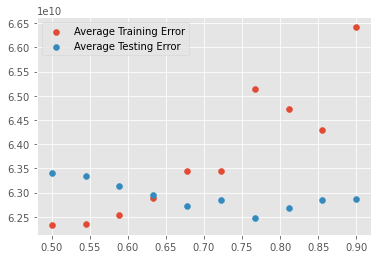

In [66]:
train_mses = []
test_mses = []

t_sizes = np.linspace(0.5, 0.9, 10)
for t_size in t_sizes:
    
    inner_train_mses = []
    inner_test_mses = []
    for i in range(10):
        # Create new split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=i)
        
       
        # Fit model
        regr.fit(X_train, y_train)

        # Append metrics to their respective lists
        y_hat_train = regr.predict(X_train)
        y_hat_test = regr.predict(X_test)
        inner_train_mses.append(mean_squared_error(y_train, y_hat_train))
        inner_test_mses.append(mean_squared_error(y_test, y_hat_test))

    train_mses.append(np.mean(inner_train_mses))
    test_mses.append(np.mean(inner_test_mses))

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Average Training Error')
ax.scatter(t_sizes, test_mses, label='Average Testing Error')
ax.legend();

## conclusion:

### Findings and Recommendations

The overall living size area of the house i.e. excluding the basement is very significant to the price. The study show a linear relationship between the size of the living space and price while the size of the basement played a very insignificant role to the houses' selling price. My recommendation would therefore be to acquire houses with a relatively larger living space as compared to the basement.

### Future Work
In the future, the next steps would be reducing noise in the data to improve the accuracy of our model. Additionally, i would like to investigate certain features like proximity to good schools, other facilities like hospital, gyms, restaurants and play grounds.